# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [7]:
# 定義並建立一神經網路
class mul_layer():
    
    def _init_(self):
        self.x = None
        self.y = None
        
    # forward-propagation  
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        return out
    
    # backward-propagation  
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

In [8]:
# 初始值設定
n_X = 2
price_Y = 100
b_TAX = 1.1

# 指定Build _Network組合
mul_fruit_layer = mul_layer()
mul_tax_layer = mul_layer()

In [11]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x, deriv = False) :
    if (deriv == True) :
        return x * (1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] 
             ])  
        
"""
define y for output dataset   
"""
y = np.array([ [0,0,1,1] 
             ]).T


In [14]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [13]:
y

array([[0],
       [0],
       [1],
       [1]])

In [16]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
# 亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
# 但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2 * np.random.random((3,4)) - 1
"""
define syn1
"""
syn1 = 2 * np.random.random((4,1)) - 1


iter = 0
# 該神經網路權重矩陣的初始化操作。
# 用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
# 用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn0_history = [syn0]
syn1_history = [syn1]

In [17]:
syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

In [18]:
syn1

array([[-0.5910955 ],
       [ 0.75623487],
       [-0.94522481],
       [ 0.34093502]])

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [20]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0, syn0))

    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1, deriv = True)
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    # forward propagation
    l2 = nonlin(np.dot(l1, syn1))
    
    # how much did we miss?
    l2_error = y - l2
    
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l2_delta = l2_error * nonlin(l2, deriv = True)
    
    
    # update weights
    syn0 += np.dot(l0.T, l1_delta)
    """
    syn1 update weights
    """
    syn1 += np.dot(l1.T, l2_delta)
    
    
    
    
    
    
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)

Output After Training:
[[0.00967022 0.00967012 0.00967177 0.00967097]
 [0.00786296 0.00786136 0.00786459 0.00786399]
 [0.99359177 0.9935933  0.99359037 0.99359086]
 [0.9921162  0.99211658 0.99211487 0.99211551]]



[[0.50814095]
 [0.50661888]
 [0.96597979]
 [0.96581602]]


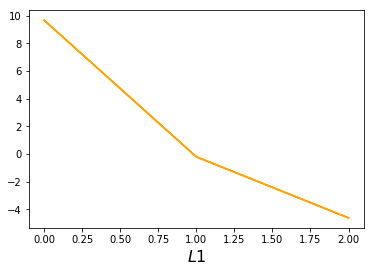

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='orange')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

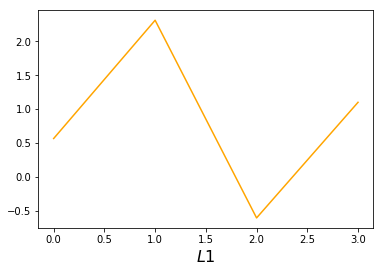

In [22]:
plt.plot(syn1_history[0], ms=3, lw=1.5, color='orange')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

# 參數定義
## X 輸入資料集，形式為矩陣，每 1 column 代表 1 個訓練樣本。

## y 輸出資料集，形式為矩陣，每 1 column 代表 1 個訓練樣本。

## l0 網路第 1 層，即網路輸入層。

## l1 網路第 2 層，常稱作隱藏層。

## syn0 第一層權值，突觸 0 ，連接 l0 層與 l1 層。

## 逐元素相乘，故兩等長向量相乘等同於其對等元素分別相乘，結果為同等長度的向量。

## – 元素相減，故兩等長向量相減等同於其對等元素分別相減，結果為同等長度的向量。

## x.dot(y) 若 x 和 y 為向量，則進行點積操作；若均為矩陣，則進行矩陣相乘操作；若其中之一為矩陣，則進行向量與矩陣相乘操作。

In [23]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x));
dy/dx = df = x*(1-x) 

為了計算方便, 這邊把 y=f(x) 與 dy/dx 放在同一function 裡面;
利用 deriv (derivative)做變數, 來分別指定方程式

'''    

def nonlin(x, deriv = False) :
    if (deriv == True) :
        return x * (1 - x)
    return 1/(1+np.exp(-x))
'''
通過 “nonlin” 函數體還能得到 sigmod 函數的導數（當形參 deriv 為 True 時）。
Sigmoid 函數優異特性之一，在於只用它的輸出值便可以得到其導數值。
若 Sigmoid 的輸出值用變數 out 表示，則其導數值可簡單通過式子 out *(1-out) 
'''

'''
input dataset
輸入資料集初始化為 numpy 中的矩陣。每一 column 為一個“訓練實例”，
每一 row 的對應著一個輸入節點。這樣，我們的神經網路便有 3 個輸入節點，
4 個訓練實例。
'''
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define output dataset 
y = np.array([[0,0,1,1]]).T

'''
輸出資料集進行初始化
.T” 為轉置函數。經轉置後，該  y  矩陣便包含 4 column 1 row。
同我們的輸入一致，每一 column 是一個訓練實例，而每一row（僅有一row）對應一個輸出節點。
因此，我們的網路含有 3 個輸入， 1 個輸出
'''

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1
iter = 0

syn0_history = [syn0]
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）

# 神經網路訓練¶
# for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [24]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    '''
    首先讓網路基於給定輸入“試著”去預測輸出。
    以至於作出一些調整，使得在每次反覆運算過程中網路能夠表現地更好一點。
    (4 x 3) dot (3 x 1) = (4 x 1)
    此 column 代碼包含兩個步驟。首先，將 l0 與 syn0 進行矩陣相乘。
    然後，將計算結果傳遞給 sigmoid 函數。具體考慮到各個矩陣的維度：
    (4 x 3) dot (3 x 1) = (4 x 1)
    '''
 
    # how much did we miss?
    l1_error = y - l1
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1, deriv = True)
    
    '''
    對於每一輸入，可知 l1 都有對應的一個“猜測”結果。那麼通過將真實的結果（y）與猜測結果（l1）作減，
    就可以對比得到網路預測的效果怎麼樣。
    l1_error 是一個有正數和負數組成的向量，它可以反映出網路的誤差有多大
    '''
    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    
print("Output After Training:")
print("\n")
print(l1)

Output After Training:


[[0.00966449]
 [0.00786506]
 [0.99358898]
 [0.99211957]]


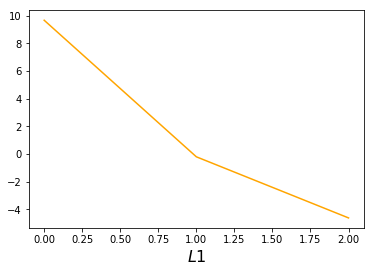

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='orange')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()